In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth

import timeit
import ODE_utils as odeu
from scipy import optimize
import tables
#from mpmath import *
#!jt -t -cellw 100%

In [2]:
###Initial Values###

M0=1.0
Q=0.95
Lambda=0.1#0.1#0.14#0.1#0.1
scalarfield=True
A=.05#.115
vscalarfield=False


In [3]:
Tol=.5
N=50
Nul=10
Nup=10**(60)
scal=10
umax=1
vmax=500
rcosmtol=.0000000000000001

datatype=np.float64


#ru0=5.0
#dr0v=.4
ru0=2.0
#dr0v=0.045
dr0v=0.05#-1/(4*-.375)*(1-2*M0/ru0+Q**2/ru0**2-Lambda*ru0**2/3)
#dr0v=.075

bdytype="edd"
scaltostan=False
solveaffine=False

Elist=[1]
#Elist=[1,2,4,8,16]

#uloc=[1/8,1/4,3/8,1/2,5/8]
#uloc=[1/5,2/5,3/5,4/5,9/10]
uloc=[8.2/10]
print(dr0v)

0.05


In [4]:
###Defining Needed Constants###

scalf=float(scal)
u0=0.0
v0=0.0
rv0=ru0
phiu0=0.0
phiv0=0.0

if M0==0.0:
    dv0=1/N    
else:
    dv0=M0/N
    


def fr(r,M0,Q,Lambda):
    return 1-2*M0/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

if Lambda>0 or Lambda<0:
    sol = optimize.root(fr,[0.687,1.3,500.0],args=(M0,Q,Lambda), method='hybr')
    rminus=sol.x[0]
    rplus=sol.x[1]
    rcosm=sol.x[2]
else:
    rplus=M0+(M0**2-Q**2)**(.5)
    rminus=M0-(M0**2-Q**2)**(.5)
    rcosm=0.0
    

wHD=True 

print("r+: "+str(rplus))
print("r-: "+str(rminus))
print("rc: "+str(rcosm))

print("Max r along u=0: "+str(ru0+vmax*dr0v))
###Predicting Run time###

###timer
start = timeit.default_timer()

Nu=Nul*umax#int(umax/du0)
Nv=int(vmax/dv0)
#print("Number of points for lowest iteration is "+str(Nu*Nv)+","+str(Nu)+"X"+str(Nv))
print("Number of points for highest iteration is "+str(Nu*Nv*max(Elist)**2)+","+str(Nu*max(Elist))+"X"+str(Nv*max(Elist)))

numpoints=Nu*Nv

print("Total number of points is "+str(int(numpoints)))

predtime=numpoints/(1700000)

print("Runtime: about "+str(format(predtime/60,'.2f'))+" minutes")


r+: 1.528728775499171
r-: 0.6767481351754444
rc: 4.130469742830307
Max r along u=0: 27.0
Number of points for highest iteration is 250000,10X25000
Total number of points is 250000
Runtime: about 0.00 minutes


In [5]:
print((rplus-rminus)/(2*rminus)*rcosm/rminus)

3.8418910111068874


In [6]:
##################################
###Applying Boundary Conditions###

Emax=max([Elist])


rnpf=np.zeros((2,Nv),dtype=datatype)
signpf=np.zeros((2,Nv),dtype=datatype)
phinpf=np.zeros((2,Nv),dtype=datatype)
drnpvf=np.zeros((2,Nv),dtype=datatype)
dsignpvf=np.zeros((2,Nv),dtype=datatype)
dphinpvf=np.zeros((2,Nv),dtype=datatype)
drnpuf=np.zeros((2,Nv),dtype=datatype)
dsignpuf=np.zeros((2,Nv),dtype=datatype)
dphinpuf=np.zeros((2,Nv),dtype=datatype)
massnpf=np.full((2,Nv),M0)#np.zeros((2,Nv))
#drunpv=np.full((1,Nv-1),-1/(4*dr0v)*(1-2*M0/ru0+Q**2/ru0**2))
 


rnpf[0], signpf[0], phinpf[0] , drnpvf[0], dsignpvf[0], dphinpvf[0], drnpuf[0], dsignpuf[0], dphinpuf[0] , massnpf[0]= odeu.boundaryv(scal,bdytype,Nv,ru0,dr0v,dv0,vmax,M0,Q,Lambda,scalarfield,A,rcosmtol,datatype)


mask=~np.isnan(rnpf[0])
#print(mask)
rnpf=rnpf[:,mask]
#print(rnpf)
Nv=int(len(rnpf[0]))
rnpf=rnpf.reshape(2,Nv)
signpf=signpf[:,mask]#.reshape(2,Nv)
phinpf=phinpf[:,mask]#.reshape(2,Nv)
dphinpuf=dphinpuf[:,mask]#.reshape(2,Nv)  
dphinpvf=dphinpvf[:,mask]#.reshape(2,Nv)
dsignpuf=dsignpuf[:,mask]#.reshape(2,Nv)
dsignpvf=dsignpvf[:,mask]#.reshape(2,Nv)
drnpuf=drnpuf[:,mask]#.reshape(2,Nv)
drnpvf=drnpvf[:,mask]#.reshape(2,Nv)
massnpf=massnpf[:,mask]#.reshape(2,Nv)

#print(massnpf)

[2.         2.00100076 2.00200306 ...        nan        nan        nan] 25000


In [7]:
print(rnpf)
print(Nv)
print(signpf)

[[2.         2.00100076 2.00200306 ... 4.12997678 4.12997678 4.12997678]
 [0.         0.         0.         ... 0.         0.         0.        ]]
20126
[[ -2.38280143  -2.38127445  -2.37974994 ... -38.4092384  -38.40976863
  -38.41025719]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


20126 20126 402.52
20126
[0.0000e+00 2.0000e-02 4.0000e-02 ... 4.0246e+02 4.0248e+02 4.0250e+02]


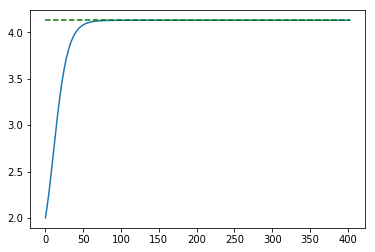

1.0001870261130823 4.129976777404562
-0.04258875868055555


In [8]:
vmax=(Nv)*dv0

print(Nv,len(rnpf[0]),vmax)

vrange=np.arange(0,vmax-.00000001*vmax,dv0)#*rnpf[0])/rnpf[0]
print(len(vrange))
print(vrange)
        
plt.plot(vrange,rnpf[0])
#plt.plot(dphinpvf[0])
#plt.plot(dphinpuf[0])
Mc=np.nanmax(massnpf[0])
rcosm=odeu.rc(Mc,Q,Lambda)
plt.plot([0,vmax],[rcosm,rcosm],linestyle='--',color='green')
plt.show()



#print(vrange)
print(Mc,rcosm)
print(drnpuf[0,0])

In [9]:
drunptemp=np.empty((Nv))*np.nan
#dsigunp=np.empty((Nu))*np.nan


A=.115
u1=9.5
u2=10

###Applying Propagation Algorithm###

urange=np.array([0.0],dtype=datatype)

massnpf[0][0]=1.0

#drunp[0]=-mth.exp(signpf[0][0])/(4.0*dr0v)*(1-2*M0/ru0+Q**2.0/ru0**2.0-Lambda*ru0**2/3)
#dsigunpvalue=100*np.exp(np.nanmax(signpf))
#drunptemp=drunp[0]
    

i=0
dv=dv0
if M0>0:
    du0=M0/Nul
elif M0==0:
    du0=1/Nul

du=du0

###fix this part (put in front of boundary conditions so it is an initial condition)
#if bdytype=="edd" or bdytype=="fulledd":
    #bdyvalue=1.0
    #dsignpuf[0]=2*(3*Q**2-3*M0*ru0+ru0**4*Lambda)/(ru0*(-3*Q**2+ru0*(6*M0-3*ru0+ru0**3*Lambda)))*drunp[0]
    #dsigunp[0]=2.0*(M0*rnpf[0]-Q**2.0)/(rnpf[0]*(Q**2.0+rnpf[0]*(-2*M0+rnpf[0])))*drunp[0]
#else:
    #bdyvalue=0.0
    #dsigunp[0]=0.0
######
    
atom = tables.Float64Atom()

rnpfile = tables.open_file('rnp.h5', mode='w',encoding="utf8") 
rnp = rnpfile.create_earray(rnpfile.root, 'data', atom, (0, Nv))

signpfile = tables.open_file('signp.h5', mode='w',encoding="utf8") 
signp = signpfile.create_earray(signpfile.root, 'data', atom, (0, Nv))
phinpfile = tables.open_file('phinp.h5', mode='w',encoding="utf8") 
phinp = phinpfile.create_earray(phinpfile.root, 'data', atom, (0, Nv))
massnpfile = tables.open_file('massnp.h5', mode='w',encoding="utf8") 
massnp = massnpfile.create_earray(massnpfile.root, 'data', atom, (0, Nv))
    
 
#rtemp=rnpf[0]   
#print(rtemp)
rnp.append(rnpf[0].reshape(1,Nv))
signp.append(signpf[0].reshape(1,Nv))
phinp.append(phinpf[0].reshape(1,Nv))
massnp.append(massnpf[0].reshape(1,Nv))

#drunp=np.append(drunp,np.nan)
#dsigunp=np.append(dsigunp,np.nan)
#dphinpuf=np.append(dphinpuf,np.nan)
drunptemp=np.nanmax(np.abs(drnpuf[0]))     
dsigunpvalue=np.nanmax(np.abs(dsignpuf[0]))
dphiutemp=np.nanmax(np.abs(dphinpuf[0]))

rnpf[1][0]=rnpf[0][0]

i=0
TempTol=1 
TempTolv=1
Eres=False
while max(urange)<umax and i<750000 and du>0.0: #and rnpf[1][0]>0.0 :

    
    du=du0*Tol*TempTol/np.nanmax([abs(dsigunpvalue),abs(drunptemp),abs(dphiutemp)])
    #du=du0*Tol*TempTol/max([abs(dsigunpvalue),abs(drunptemp),abs(dphiutemp)])

    
    if du<1/Nup*1.1:
        du=1/Nup
     
    
    if du>=1/Nul:
        #print('r='+str(rnpf[i][0]))
        if rnpf[1][0]<rplus:
            du=1/(1*Nul)
            #print(rplus)
        else:
            du=1/Nul
    

    print("%.24f" % urange[i])
    print("%.24f" % du)
    
    ###fix this section (dphinpuf is in the wrong form)
    #if urange[i]>u1 and urange[i]<u2 and vscalarfield==True:
        #u=urange[i]+du
        #phinpf[1][0]=A*64*(u-u1)**3.0*(u2-u)**3.0/(u2-u1)**6.0
        #dphinpuf[i]=192*A*(u-u1)**2.0*(u-u2)**2.0*(-2*u+u1+u2)/(u1-u2)**6.0 
    #else:
        #continue
        #phinpf[1][0]=0.0
        #dphinpuf[i+1]=0.0
    

    ###Predictor###
    drnpvf[1]=drnpvf[0]+du*odeu.Rfunc(drnpvf[0],drnpuf[0],rnpf[0],signpf[0],Q,Lambda)
    dsignpvf[1]=dsignpvf[0]+du*odeu.Sigfunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0],signpf[0],Q)
    dphinpvf[1]=dphinpvf[0]+du*odeu.Phifunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0])
    drnpuf[1]=drnpuf[0]+du*odeu.Coneq(drnpuf[0],dsignpuf[0],dphinpuf[0],rnpf[0])
    
    rnpf[1]=rnpf[0]+1/2*du*(drnpuf[0]+drnpuf[1])
    signpf[1]=signpf[0]+du*dsignpuf[0]
    phinpf[1]=phinpf[0]+du*dphinpuf[0]
    
    #if np.any(phinpf[1]): 
        #dsignpuf[1][0]=0.0
        #dphinpuf[1][0]=0.0
        #for j in range(0,Nv-1):
            #dphinpuf[1][j+1]=dphinpuf[1][j]+dv*odeu.Phifunc(drnpvf[1][j],drnpuf[1][j],dphinpuf[1][j],dphinpvf[1][j],rnpf[1][j])         
            #dphinpuf[1][j+1]=dphinpuf[1][j]+1/2*dv*(odeu.Phifunc(drnpvf[1][j],drnpuf[1][j],dphinpuf[1][j],dphinpvf[1][j],rnpf[1][j])+odeu.Phifunc(drnpvf[1][j+1],drnpuf[1][j+1],dphinpuf[1][j+1],dphinpvf[1][j+1],rnpf[1][j+1]))
            #dsignpuf[1][j+1]=dsignpuf[1][j]+dv*odeu.Sigfunc(drnpvf[1][j],drnpuf[1][j],dphinpuf[1][j],dphinpvf[1][j], rnpf[1][j],signpf[1][j],Q)                                                                             
            #Phifuncnp=odeu.Phifunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1])
    #else:
        #dphinpuf[1]=0.0
    #dsignpuf[1][0]=0.0
    #dphinpuf[1][0]=0.0 
    #print(dsignpuf[1])
    #print(dphinpuf[1])
    
    dphinpuf[1]=1/(rnpf[1])*(rnpf[1][0]*dphinpuf[1][0]-1/2*dv*(np.cumsum(drnpuf[1]*dphinpvf[1]+np.roll(drnpuf[1]*dphinpvf[1],1))-(drnpuf[1][0]*dphinpvf[1][0]+np.roll(drnpuf[1]*dphinpvf[1],1)[0])))
    Sigfuncnp=odeu.Sigfunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1],signpf[1],Q)
    dsignpuf[1]=dsignpuf[1][0]+1/2*dv*(np.cumsum(Sigfuncnp+np.roll(Sigfuncnp,1))-(Sigfuncnp[0]+np.roll(Sigfuncnp,1)[0]))
    
    #print(dsignpuf[1])
    #print(dphinpuf[1])
    
    ###Correction###
    drnpvf[1]=drnpvf[0]+1/2*du*(odeu.Rfunc(drnpvf[0],drnpuf[0],rnpf[0],signpf[0],Q,Lambda)+odeu.Rfunc(drnpvf[1],drnpuf[1],rnpf[1],signpf[1],Q,Lambda))
    dsignpvf[1]=dsignpvf[0]+1/2*du*(odeu.Sigfunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0],signpf[0],Q)+odeu.Sigfunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1],signpf[1],Q))
    dphinpvf[1]=dphinpvf[0]+1/2*du*(odeu.Phifunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0])+odeu.Phifunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1]))
    drnpuf[1]=drnpuf[0]+1/2*du*(odeu.Coneq(drnpuf[0],dsignpuf[0],dphinpuf[0],rnpf[0])+odeu.Coneq(drnpuf[1],dsignpuf[1],dphinpuf[1],rnpf[1]))
    
    rnpf[1]=rnpf[0]+1/2*du*(drnpuf[0]+drnpuf[1])
    signpf[1]=signpf[0]+1/2*du*(dsignpuf[0]+dsignpuf[1])
    phinpf[1]=phinpf[0]+1/2*du*(dphinpuf[0]+dphinpuf[1])
    
    #########
    #if np.any(phinpf[1]): 
        #dsignpuf[1][0]=0.0
        #dphinpuf[1][0]=0.0
        #for j in range(0,Nv-1):
            #dphinpuf[1][j+1]=dphinpuf[1][j]+1/2*dv*(odeu.Phifunc(drnpvf[1][j],drnpuf[1][j],dphinpuf[1][j],dphinpvf[1][j],rnpf[1][j])+odeu.Phifunc(drnpvf[1][j+1],drnpuf[1][j+1],dphinpuf[1][j+1],dphinpvf[1][j+1],rnpf[1][j+1]))         
            #dsignpuf[1][j+1]=dsignpuf[1][j]+1/2*dv*(odeu.Sigfunc(drnpvf[1][j],drnpuf[1][j],dphinpuf[1][j],dphinpvf[1][j],rnpf[1][j],signpf[1][j],Q)+odeu.Sigfunc(drnpvf[1][j+1],drnpuf[1][j+1],dphinpuf[1][j+1],dphinpvf[1][j+1],rnpf[1][j+1],signpf[1][j+1],Q))    
    #else:
        #dphinpuf[1]=0.0
    #dsignpuf[1][0]=0.0
    #dphinpuf[1][0]=0.0
    ########
    
    
    dphinpuf[1]=1/(rnpf[1])*(rnpf[1][0]*dphinpuf[1][0]-1/2*dv*(np.cumsum(drnpuf[1]*dphinpvf[1]+np.roll(drnpuf[1]*dphinpvf[1],1))-(drnpuf[1][0]*dphinpvf[1][0]+np.roll(drnpuf[1]*dphinpvf[1],1)[0])))
    Sigfuncnp=odeu.Sigfunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1],signpf[1],Q)
    dsignpuf[1]=dsignpuf[1][0]+1/2*dv*(np.cumsum(Sigfuncnp+np.roll(Sigfuncnp,1))-(Sigfuncnp[0]+np.roll(Sigfuncnp,1)[0]))

    massnpf[1]=(1+4.0*np.exp(-signpf[1])*drnpuf[1]*drnpvf[1])*rnpf[1]/2.0+np.power(Q,2.0)/(2.0*rnpf[1])-Lambda*np.power(rnpf[1],3.0)/6.0
    
    #####
    
    drunptemp=np.nanmax(np.abs(drnpuf[1]))      
    dsigunpvalue=np.nanmax(np.abs(dsignpuf[1]))    
    dphiutemp=np.nanmax(np.abs(dphinpuf[1]))
    
    #if float(dsigunpvalue*du)>1000:#0.1:
        #TempTol=TempTol/2
        #Eres=True
    #else:
        
    if urange[i]+du<umax:
        urange=np.append(urange,urange[i]+du)
    else:
        break
        
    rnp.append(rnpf[1].reshape(1,Nv))
    signp.append(signpf[1].reshape(1,Nv))
    phinp.append(phinpf[1].reshape(1,Nv))
    massnp.append(massnpf[1].reshape(1,Nv))
    
    #drunp=np.append(drunp,np.nan)
    #dsigunp=np.append(dsigunp,np.nan)
    #dphinpuf=np.append(dphinpuf,np.nan)
    print(drnpuf[1][-1])
    print(dsignpuf[1][-1])
    print(dsignpvf[1][-1])
    #print('--')
    #print(drnpvf[1][-1])
    #print(dsignpvf[1][-1])
    #print(dphinpvf[1][-1])
    #print('--')
    print(massnpf[1][-2])
    #print(dphinpuf[1][-1])
    print('---')
    
    
    rnpf[0]=rnpf[1]
    phinpf[0]=phinpf[1]
    signpf[0]=signpf[1]
    drnpvf[0]=drnpvf[1]
    dsignpvf[0]=dsignpvf[1]
    dphinpvf[0]=dphinpvf[1]
    drnpuf[0]=drnpuf[1]
    dsignpuf[0]=dsignpuf[1]
    dphinpuf[0]=dphinpuf[1]
    #massnpf[0]=massnpf[1]
    
        
        
    #if Eres==True:
        #TempTol=2*TempTol
    #else:
        #TempTol=1
    #Eres=False
    i+=1
    
    
    

    #if rnpf[1][0]<0.0 or np.isnan(du):
        #break
   
    


0.000000000000000000000000
0.100000000000000005551115
-1.061599466332506e-11
0.1515409304767639
0.014901523910953307
1.0001870256308096
---
0.100000000000000005551115
0.100000000000000005551115
-2.1714436013183062e-11
0.15300882456736747
0.014901523910953307
1.000187025582801
---
0.200000000000000011102230
0.100000000000000005551115
-3.33138922005794e-11
0.15450416273526155
0.014901523910953307
1.0001870255336887
---
0.300000000000000044408921
0.100000000000000005551115
-4.5433750501040227e-11
0.1560277155625955
0.014901523910953307
1.000187025483459
---
0.400000000000000022204460
0.100000000000000005551115
-5.809420437082577e-11
0.15758028277990346
0.014901523910953307
1.0001870254320993
---
0.500000000000000000000000
0.100000000000000005551115
-7.131629368927787e-11
0.15916269465932983
0.014901523910953307
1.0001870253795966
---
0.599999999999999977795540
0.100000000000000005551115
-8.512194746484046e-11
0.16077581348859457
0.014901523910953307
1.0001870253259377
---
0.69999999999999

/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


In [10]:
rnpfile.close()
signpfile.close()

phinpfile.close()
massnpfile.close()


In [11]:
Nu=i+1

print(len(rnpf[0,:]))
print(len(rnpf))
print(Nu)
print(len(urange))
#print(len(rnp))
#rnpf[i+1][j+1]=answer[0]
#phinpf[i+1][j+1]=answer[1]
#signpf[i+1][j+1]=answer[2]
#massnpf[i+1][j+1]=answer[3]
#drunp[i+1][j+1]=answer[4]
#dsigunp[i+1][j+1]=answer[5]

20126
2
11
11


In [12]:
#print(drnpvf[1,:])
#=> drnpvf,drnpuf,rnpf,signpf are NOT the problem
#print(dsignpuf[0,:])
#print(dphinpuf[1,:])

print(dsignpuf[1,:])


###wrong arrays###
#print(dsignpuf[1,:])
#print(dphinpuf[1,:])

[0.00000000e+00 1.06865059e-04 2.13878864e-04 ... 1.67553815e-01
 1.67553815e-01 1.67553815e-01]


In [13]:
switch=0.0
np.save('rnputil',np.array([Nu*Nv,Nu,Nv,ru0,dr0v,M0,Q,Lambda,wHD,switch,bdytype]))
np.save('urange',urange)
np.save('vrange',vrange)

In [14]:
stop = timeit.default_timer()

In [15]:
acttime=stop - start

numpoints=Nu*Nv



print(str(acttime)+' seconds')
print(str((acttime)/60)+' minutes')
print(str((acttime)/3600)+' hours')

print(str(numpoints)+' points')

print(str((numpoints)/(stop - start))+' points per second') 

exttimef=(acttime-predtime)/60

exttime=format(abs((acttime-predtime)/60),'.2f')
if exttimef>0.0:
    print("Took "+str(exttime)+" more minutes")
if exttimef<0.0:
    print("Took "+str(exttime)+" less minutes")
if exttimef==0.0:
    print("Took exactly the right time!!!!")

36.047320577999926 seconds
0.6007886762999988 minutes
0.010013144604999979 hours
221386 points
6141.538301604428 points per second
Took 0.60 more minutes


conv=False
j=0
tempanswer=[]
    while conv==False:
        dv=TempTolv*dv0
        jcount=1
        while j<Nv-1:
            j1=mth.ceil(jcount*TempTolv)
            j2=mth.floor(jcount*TempTolv)
            answer=dnu.x4giveralt(0,j+mth.ceil((jcount-1)*TempTolv),du,dv*TempTolv,rnpf,phinpf,signpf,massnpf,M0,Q,Lambda,datatype)
            rnpf[1][j+j1]=answer[0]
            phinpf[1][j+j1]=answer[1]
            signpf[1][j+j1]=answer[2]
            massnpf[1][j+j1]=answer[3]
            #drunptemp[j+1]=answer[4]
            dsigunpv=answer[5]
            jcount=(jcount+1)**(0**j2)
            j=j+j2
        
        if np.abs(tempanswer[0]-answer[0])/answer[0]>0.01 or not tempanswer:
            tempanswer=answer
            TempTol=TempTolv/2
            
        else:
            conv=True
            